
# 📈 Stock Market Forecasting using Time Series Models

## 🔍 Objective
To forecast stock market prices using classical and deep learning-based time series models:
- **ARIMA**
- **SARIMA**
- **LSTM**
- **Facebook Prophet**

## 📚 Table of Contents
1. [Introduction](#introduction)
2. [Data Collection](#data-collection)
3. [Data Preprocessing](#data-preprocessing)
4. [Exploratory Data Analysis](#exploratory-data-analysis)
5. [Modeling Approaches](#modeling-approaches)
   - [ARIMA](#1-arima)
   - [SARIMA](#2-sarima)
   - [LSTM](#3-lstm)
   - [Prophet](#4-prophet)
6. [Evaluation Metrics](#evaluation-metrics)
7. [Results and Comparisons](#results-and-comparisons)
8. [Conclusion](#conclusion)
9. [References](#references)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
df=pd.read_csv("apple_data.csv")
# Ensure Date column is datetime
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df.head()

,Date,Close,High,Low,Open,Volume
0,1980-12-12,0.098597,0.099025,0.098597,0.098597,469033600
1,1980-12-15,0.093453,0.093881,0.093453,0.093881,175884800
2,1980-12-16,0.086594,0.087022,0.086594,0.087022,105728000
3,1980-12-17,0.088737,0.089165,0.088737,0.088737,86441600
4,1980-12-18,0.091310,0.091738,0.091310,0.091310,73449600


In [4]:
df.isnull().sum()

,0
Date,0
Close,0
High,0
Low,0
Open,0
Volume,0


In [5]:
df.shape

(11226, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11226 entries, 0 to 11225
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    11226 non-null  datetime64[ns]
 1   Close   11226 non-null  float64       
 2   High    11226 non-null  float64       
 3   Low     11226 non-null  float64       
 4   Open    11226 non-null  float64       
 5   Volume  11226 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 526.3 KB


In [7]:
df.duplicated().sum()

np.int64(0)

### ✅ 1. Line Plot (Close Price Over Time)

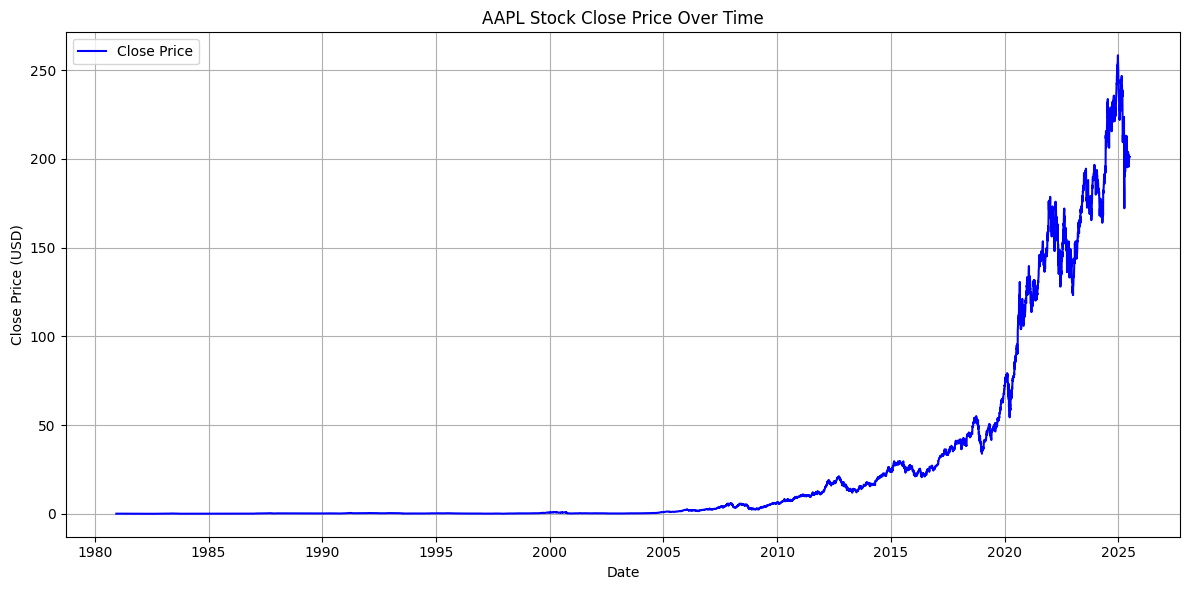

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Close Price', color='blue')
plt.title('AAPL Stock Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### ✅ 2. Candlestick Chart (Open, High, Low, Close)

In [11]:
 import plotly.graph_objects as go

 fig = go.Figure(data=[go.Candlestick(x=df.index,
                 open=df['Open'],
                 high=df['High'],
                 low=df['Low'],
                 close=df['Close'])])

 fig.update_layout(title='AAPL Candlestick Chart',
                   xaxis_title='Date',
                   yaxis_title='Price (USD)',
                   xaxis_rangeslider_visible=False)

 fig.show()


### ✅ 3. Volume Over Time

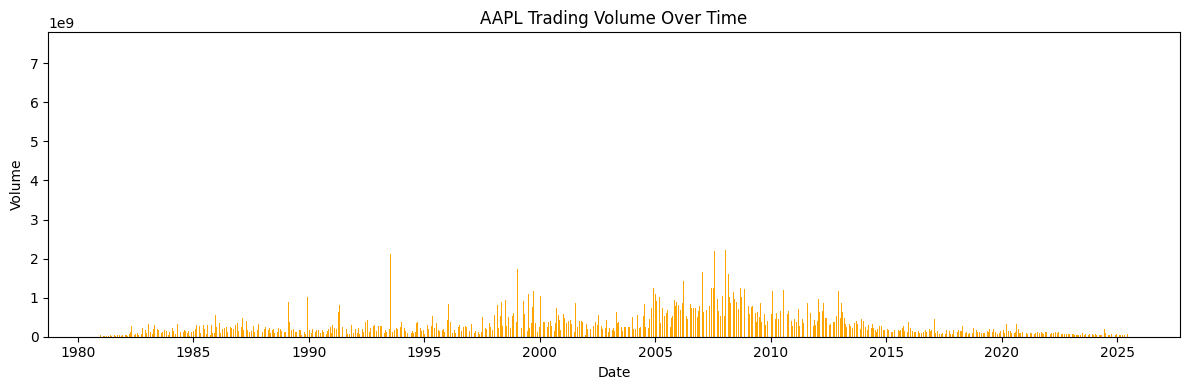

In [10]:
plt.figure(figsize=(12, 4))
plt.bar(df['Date'], df['Volume'], color='orange')
plt.title('AAPL Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.tight_layout()
plt.show()


### ✅ 4. Moving Averages

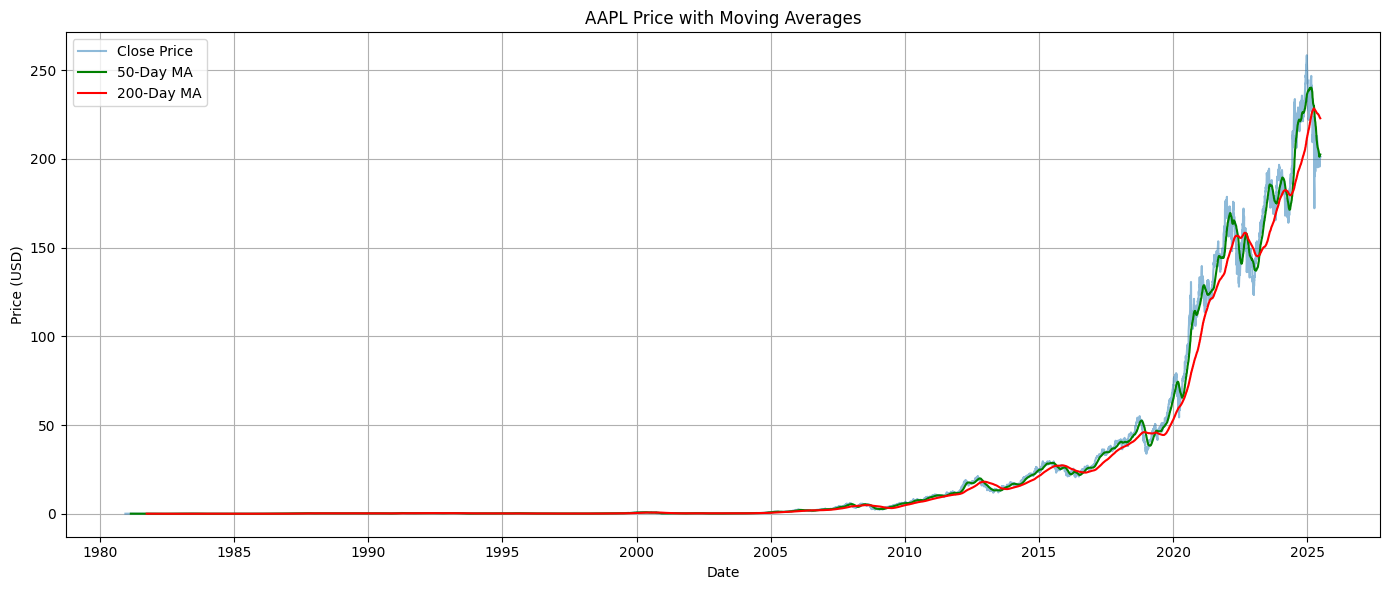

In [12]:
# Add moving averages
df['MA50'] = df['Close'].rolling(window=50).mean()
df['MA200'] = df['Close'].rolling(window=200).mean()

plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['Close'], label='Close Price', alpha=0.5)
plt.plot(df['Date'], df['MA50'], label='50-Day MA', color='green')
plt.plot(df['Date'], df['MA200'], label='200-Day MA', color='red')
plt.title('AAPL Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### ✅ 5. Correlation Heatmap

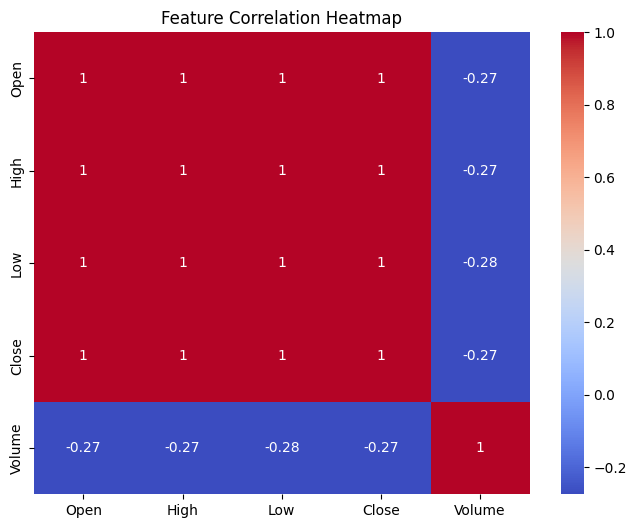

In [13]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(df[['Open', 'High', 'Low', 'Close', 'Volume']].corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


## LSTM model

In [18]:
data=df

In [17]:
import os
import numpy as np
import pandas as pd
import pickle
import tensorflow
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense

# 📁 Ensure the 'models' directory exists
os.makedirs('models', exist_ok=True)

# 📥 Load and preprocess data
data = pd.read_csv('apple_data.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Scale the 'Close' prices
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[['Close']])

# 💾 Save the scaler for future use
with open('models/scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# 📚 Create dataset sequences
def create_dataset(dataset, time_step=60):
    X, y = [], []
    for i in range(len(dataset) - time_step - 1):
        X.append(dataset[i:(i + time_step), 0])
        y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 60
X, y = create_dataset(scaled_data, time_step)

# Reshape input to [samples, time_steps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))

# 🧠 Build the LSTM model
model = Sequential()
model.add(LSTM(units=64, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(units=64))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

# 🏋️ Train the model
model.fit(X, y, epochs=30, batch_size=32, verbose=1)

# 💾 Save the model
model_path = 'models/lstm_model.h5'
model.save(model_path)
print(f"✅ Model saved to: {model_path}")

# ✅ Test model loading
try:
    loaded_model = load_model(model_path)
    print("✅ Model loaded successfully.")
except Exception as e:
    print(f"❌ Error loading model: {e}")


Epoch 1/30
349/349 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 0.0030
Epoch 2/30
349/349 ━━━━━━━━━━━━━━━━━━━━ 14s 39ms/step - loss: 1.4324e-04
Epoch 3/30
349/349 ━━━━━━━━━━━━━━━━━━━━ 21s 41ms/step - loss: 1.0348e-04
Epoch 4/30
349/349 ━━━━━━━━━━━━━━━━━━━━ 19s 38ms/step - loss: 8.6022e-05
Epoch 5/30
349/349 ━━━━━━━━━━━━━━━━━━━━ 13s 38ms/step - loss: 6.7761e-05
Epoch 6/30
349/349 ━━━━━━━━━━━━━━━━━━━━ 21s 39ms/step - loss: 6.7089e-05
Epoch 7/30
349/349 ━━━━━━━━━━━━━━━━━━━━ 13s 37ms/step - loss: 6.4000e-05
Epoch 8/30
349/349 ━━━━━━━━━━━━━━━━━━━━ 13s 38ms/step - loss: 6.7895e-05
Epoch 9/30
349/349 ━━━━━━━━━━━━━━━━━━━━ 14s 39ms/step - loss: 4.4819e-05
Epoch 10/30
349/349 ━━━━━━━━━━━━━━━━━━━━ 13s 38ms/step - loss: 5.3311e-05
Epoch 11/30
349/349 ━━━━━━━━━━━━━━━━━━━━ 21s 40ms/step - loss: 4.1529e-05
Epoch 12/30
349/349 ━━━━━━━━━━━━━━━━━━━━ 20s 38ms/step - loss: 5.4938e-05
Epoch 13/30
349/349 ━━━━━━━━━━━━━━━━━━━━ 21s 40ms/step - loss: 3.5803e-05
Epoch 14/30
349/349 ━━━━━━━━━━━━━━━━━━━━ 20s 38ms/s

✅ Model saved to: models/lstm_model.h5


✅ Model loaded successfully.


## Aarima -Sarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 689.1/689.1 kB 11.9 MB/s eta 0:00:00
Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=19.87 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=41095.734, Time=0.22 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=37631.822, Time=0.51 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=7.04 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=41093.734, Time=0.19 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=36644.183, Time=1.08 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=35993.658, Time=1.65 sec
 ARIMA(4,2,0)(0,0,0)[0] intercept   : AIC=35486.610, Time=1.86 sec
 ARIMA(5,2,0)(0,0,0)[0] intercept   : AIC=35143.552, Time=2.41 sec
 ARIMA(5,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=30.76 sec
 ARIMA(4,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=20.62 sec
 ARIMA(5,2,0)(0,0,0)[0]             : AIC=35141.552, Time=0.84 sec
 ARIMA(4,2,0)(0,0,0)[0]             : AIC=35484.610, Time=0.65 sec
 ARIMA(5,2,1)(0,0,0)[0]   

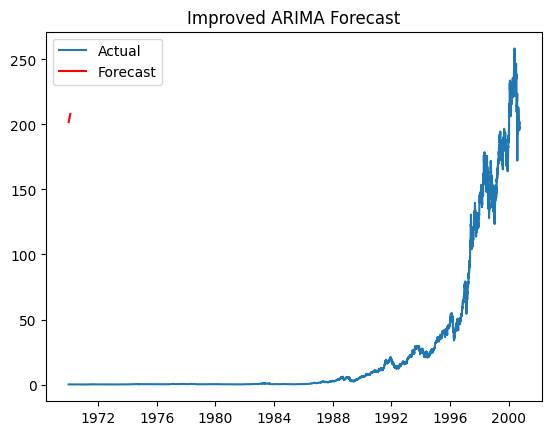

In [20]:
!pip install pmdarima
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Auto ARIMA
auto_model = auto_arima(data['Close'], seasonal=False, trace=True)
best_order = auto_model.order

# Fit model
model = ARIMA(data['Close'], order=best_order)
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=30)

# Plot
plt.plot(data['Close'], label='Actual')
forecast.index = pd.date_range(data.index[-1], periods=30, freq='B')
plt.plot(forecast, label='Forecast', color='red')
plt.title('Improved ARIMA Forecast'); plt.legend(); plt.show()

### Sarima

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=5141.322, Time=0.70 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5139.683, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5141.126, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5141.152, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5138.069, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5143.678, Time=0.16 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.071 seconds
Best ARIMA Order: (0, 1, 0)


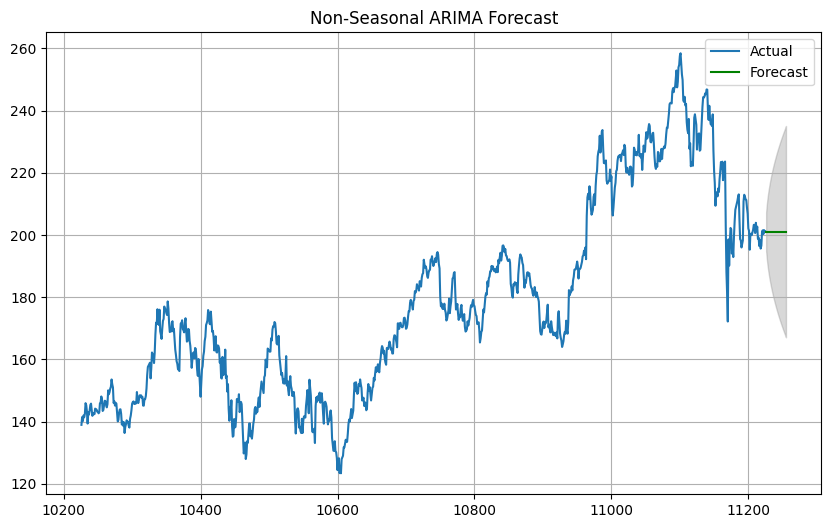

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA

# Reduce memory load
data = data[['Close']].dropna().tail(1000)  # Keep fewer rows

# Auto ARIMA without seasonal component
auto_model = auto_arima(
    data['Close'],
    seasonal=False,
    stepwise=True,
    suppress_warnings=True,
    trace=True,
    max_p=2,
    max_q=2,
    max_order=4,
    n_fits=10
)

best_order = auto_model.order
print("Best ARIMA Order:", best_order)

# Fit ARIMA
model = ARIMA(data['Close'], order=best_order)
model_fit = model.fit()

# Forecast
forecast = model_fit.get_forecast(steps=30)
forecast_ci = forecast.conf_int()

# Plot
plt.figure(figsize=(10, 6))
plt.plot(data['Close'], label='Actual')
forecast.predicted_mean.plot(label='Forecast', color='green')
plt.fill_between(forecast_ci.index,
                 forecast_ci.iloc[:, 0],
                 forecast_ci.iloc[:, 1],
                 color='gray', alpha=0.3)
plt.title('Non-Seasonal ARIMA Forecast')
plt.legend()
plt.grid(True)
plt.show()


### Prophet

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


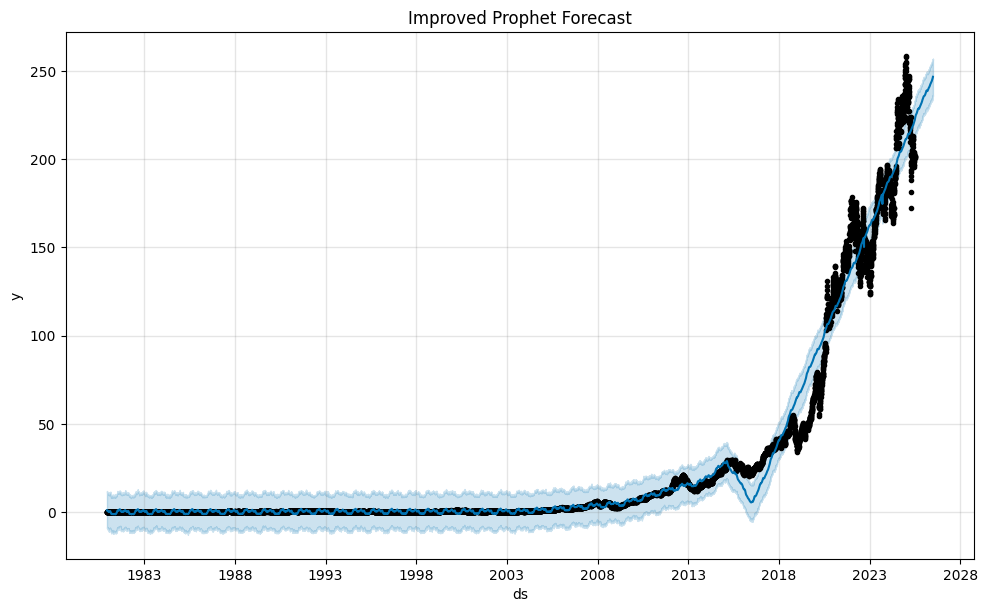

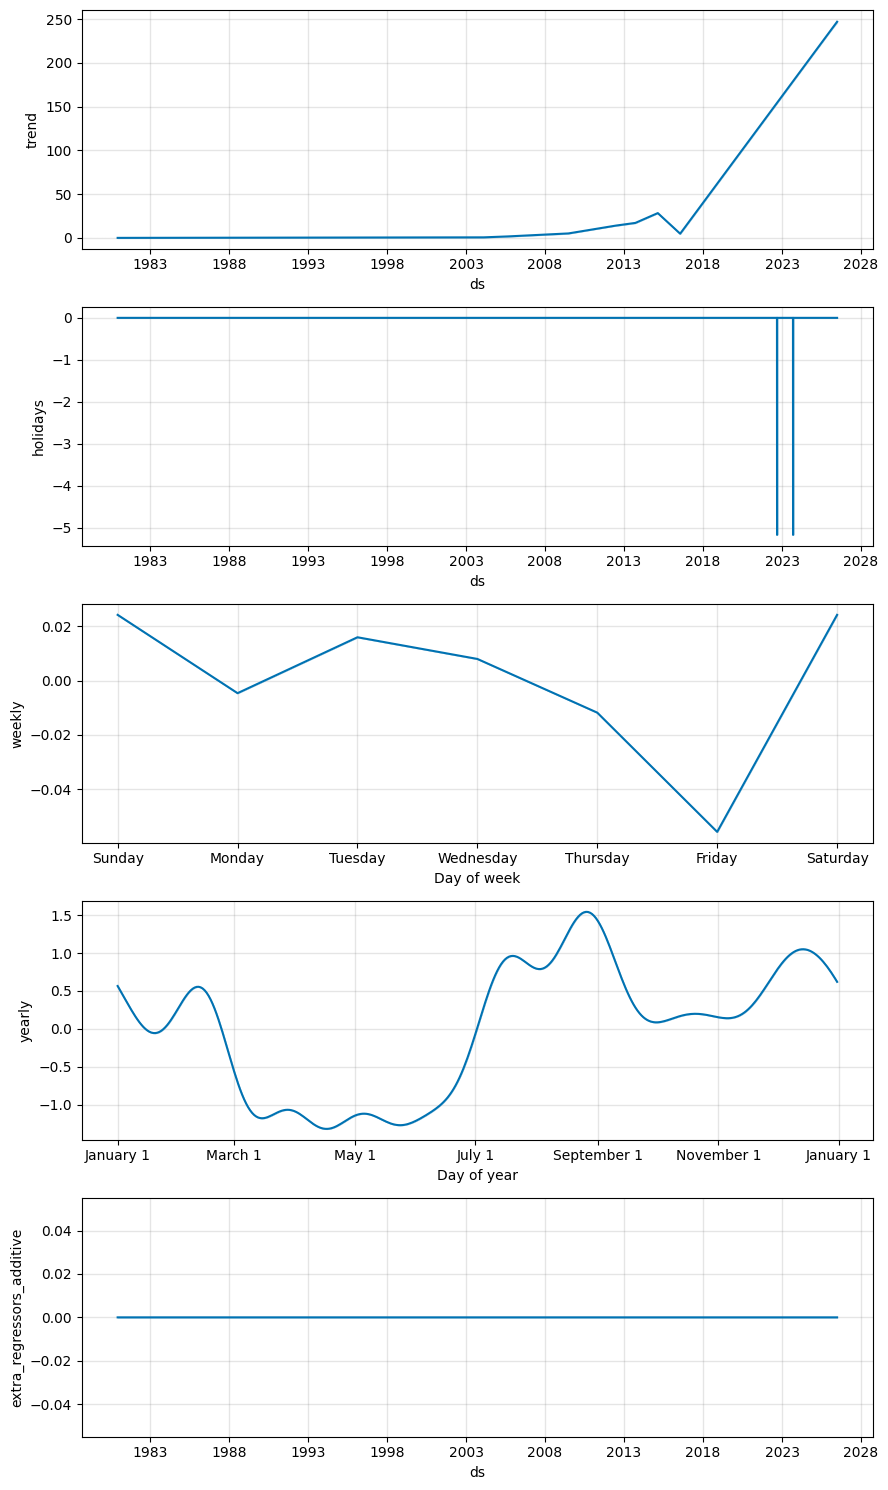

In [23]:
from prophet import Prophet

# Use the original 'df' which contains 'Date', 'Close', and 'Volume' columns.
# Filter and rename columns for Prophet. Ensure 'Date' is already datetime.
prophet_df = df[['Date', 'Close', 'Volume']].rename(columns={'Date': 'ds', 'Close': 'y'})

holidays = pd.DataFrame({
    'holiday': 'apple_event',
    'ds': pd.to_datetime(['2023-09-12', '2022-09-07']),
    'lower_window': 0,
    'upper_window': 1,
})

# Initialize Prophet model
model = Prophet(holidays=holidays, changepoint_prior_scale=0.05)

# Add 'Volume' as an extra regressor. Note: the column name is 'Volume' in prophet_df.
model.add_regressor('Volume')

# Fit the model using the prepared prophet_df
model.fit(prophet_df)

# Create future dataframe for predictions
future = model.make_future_dataframe(periods=365)

# Add future values for the regressor 'Volume'.
# Assuming mean volume for the forecast period.
future['Volume'] = prophet_df['Volume'].mean()

# Make predictions
forecast = model.predict(future)

# Plot the forecast
model.plot(forecast)
plt.title('Improved Prophet Forecast')
plt.show()

# Plot components
model.plot_components(forecast)
plt.show()